In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from scipy.optimize import least_squares, brute,minimize, root
from scipy import optimize
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [351]:
def plot_approx(params, f, name, label = 'k*x + b', color = 'r'):
    x_ = np.linspace(0,1,len(x))
    a, b = params
    y_ = list(map(lambda X:f(X, a, b), x_))
    
    plt.scatter(x,y, color = 'c')
    plt.plot(x_, y_, color = color, label = label)
    plt.title (name)
    plt.legend()

In [3]:
interations_GD

NameError: name 'interations_GD' is not defined

In [340]:
def linear(x, a, b):
    #print("XNYA", x, a, b)
    
    return x*a + b

def linear2(a, x):
    a, b = a
    x = np.asarray(x)
    print(a,b)
    return x*a + b

def rational(x, a, b):
   # print(x,a,b)
    #a, b = a
    return a/(1 + b*x)

def MSE(params):
    global x
    global y
    global f
    result = 0
    for k in range(0, len(x)):
        result+=(f(x[k], params[0], params[1]) - y[k])**2
    return result

def MSE_2(t, X):
    global x
    global y
    
   # print(X)
    X,Y = X
  #  A, B = paraps
    
#     print("x ->", x)
#     print("y ->", y)
#     print("a ->", A)
#     print("b ->", B)
    global f
    result = 0
    arr = np.zeros((len(X), len(Y)))
    for i,A in enumerate(X):
        for j,B in enumerate(Y):
            for k in range(0, len(x)):
                result+=(f(x[k], A, B) - y[k])**2
            arr[i,j] = result
            
    return arr

def derivatives(theta, X, Y):
    dev = [0, 0]
    dev[0] = (Y - (theta[1] + theta[0]*X))
    dev[1] = (Y - (theta[1] + theta[0]*X))*X
    return -2*dev[0], -2*dev[1]

interations_GD = 0
def GD(z0, z1, X, Y, v, k):
    global interations_GD
    dev = [100,100]
    theta = [100, 100]
    last_value = [1000, 1000]
    z0, z1 = -200, -200
    interations_GD = 0
    while (((z0 - last_value[0])**2 + (z1 - last_value[1])**2)**0.5) > 0.0000000001:
        last_value = [z0, z1] 
        theta = np.asarray((z0,z1))
        i = random.randint(0, len(X)-1)
        dev = derivatives(theta, X[i], Y[i])
      #  print(z0, z1)
        z0 = z0 - v*(dev[1])
        z1 = z1 - v*(dev[0])
        interations_GD+=1
       # print((((z0 - last_value[0])**2 + (z1 - last_value[1])**2)**0.5))
        
    return (z0, z1)


def gradient_descent(x0, f, f_prime, hessian=None, adaptative=True):
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()
    iters = 0
    f_count = 0
    step = 0.01
    for i in range(1, 1000):
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))
        if adaptative:
            # Compute a step size using a line_search to satisfy the Wolf
            # conditions
            step = optimize.line_search(f, f_prime,
                                np.r_[x_i, y_i], -np.r_[dx_i, dy_i],
                                np.r_[dx_i, dy_i], c2=.05)
            step = step[0]
            if step is None:
                step = 1
        else:
            step = 1
       # print(dx_i, dy_i)

        x_i -=  step*dx_i
        y_i -=  step*dy_i
       # print(f([x_i, y_i]))
        if np.abs(all_f_i[-1]) < 1e-16:
            break
    return all_x_i, all_y_i, all_f_i

In [23]:
a = np.random.random()
b = np.random.random()

In [24]:
x = []
y = []

for i in range(1,1000):
    xk = i/100
    q = np.random.normal(0, 1)
    yk = a*xk + b + q
    
    x.append(xk)
    y.append(yk)

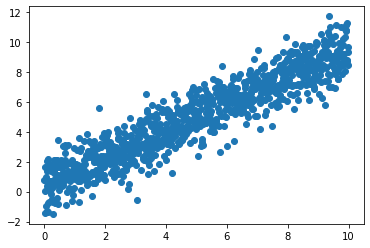

In [25]:
plt.scatter(x,y)

### Linear

In [26]:
help(root)

Help on function root in module scipy.optimize._root:

root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
    Find a root of a vector function.
    
    Parameters
    ----------
    fun : callable
        A vector function to find a root of.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its Jacobian.
    method : str, optional
        Type of solver.  Should be one of
    
            - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
            - 'lm'               :ref:`(see here) <optimize.root-lm>`
            - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
            - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
            - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
            - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
            - 'diagbroyden'      :ref:`(see here) <opti

[0.90616986 0.46157267] [[ 0.00012104 -0.0006052 ]
 [-0.0006052   0.00403264]]
0.906169863162487 0.4615726718916815


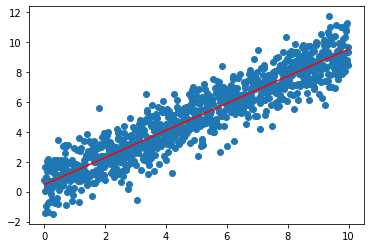

In [27]:
from scipy.optimize import curve_fit

p0 = [0,0]
popt, pcov = curve_fit(linear, p0 = p0,  xdata = x, ydata= y, method='lm')

print(popt, pcov )

plt.scatter(x,y)
plt.plot(x,linear2(popt, x), color = 'r')

In [149]:
from scipy.optimize import root
x0 =  0.
f = linear
fprime = lambda x: optimize.approx_fprime(x, linear2, 0.0001)
res = root(MSE_2, args = [list(range(-100,100)) , list(range(-100,100))], x0 = x0, method='lm')

print(res)

KeyboardInterrupt: 

In [ ]:
plt.plot(linear2(res.ipvt[::-1], x)[:11], color = 'r')
plt.scatter(x, y)

In [354]:
x0 = np.array([0, 0])
f = linear
fprime = lambda x: optimize.approx_fprime(x, MSE, 0.0001)
res1_l = gradient_descent(x0, MSE, fprime)

options = {'disp': True}

res2_l = optimize.minimize(MSE, x0, method='Newton-CG', options=options, jac = fprime)
res1_l = GD(0, 0, x, y, 0.001, 3)

p0 = [0,0]
res_3, pcov = curve_fit(linear, p0 = p0,  xdata = x, ydata= y, method='lm')

#print(max(res1_l)[0], max(res1_l)[1])
print(res2_l.x)
print(res3_l)

C:\Users\mi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Optimization terminated successfully.
         Current function value: 5.762125
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 16
         Hessian evaluations: 0
[0.68568622 0.14762006]


NameError: name 'res3_l' is not defined

2


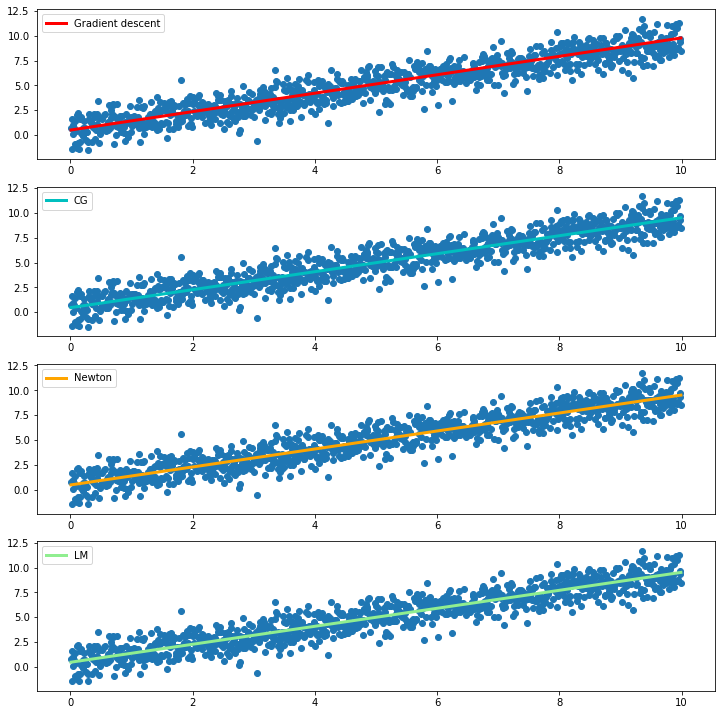

In [218]:

print(len(res1_l))

plt.figure(figsize = (10,10))
plt.subplot(4,1,1)
plt.plot(x, linear(np.asarray(x), *res1_l), label = "Gradient descent", color = 'r', linewidth = 3)
plt.scatter(x, y)
plt.legend()
plt.subplot(4,1,2)
plt.plot(x, linear(np.asarray(x), *res2_l.x), label = "CG", color = 'c', linewidth = 3)
plt.scatter(x, y)
plt.legend()
plt.subplot(4,1,3)
plt.plot(x, linear(np.asarray(x), *res2_l.x), label = "Newton", color = 'orange', linewidth = 3)
plt.scatter(x, y)
plt.legend()
plt.subplot(4,1,4)
plt.plot(x, linear(np.asarray(x), res_3[0], res_3[1]), label = "LM", color = 'lightgreen', linewidth = 3)
plt.scatter(x, y)
plt.legend()
plt.tight_layout()

In [ ]:
plt.figure(figsize = (10,7))

plot_approx(res1_l, linear, color = 'orange',name = "Gradient descent: linear approx",
            label ='Gradient descent %.2f*x + %.2f'%tuple(res1_l))
plot_approx(res2_l.x, linear, color = 'red',name ="Сonjugate gradient: linear approx",
            label ='Сonjugate gradient %.2f*x + %.2f'%tuple(res2_l.x))
plot_approx([res_3[0],  res_3[1]],f = linear, color = 'blue',name ="LM: linear approx",
            label ='LM %.2f*x + %.2f'%tuple(res_3))
plot_approx(res2_l.x, linear, color = 'green', name ="Linear approx",
            label ='Newton %.2f*x + %.2f'%tuple(res2_l.x))

### Rational

In [296]:
x = np.asarray(x)
x_.shape

fprime = lambda x: optimize.approx_fprime(x_, MSE, 0.001)



In [314]:
x_old = x.copy()
y_old = y.copy()

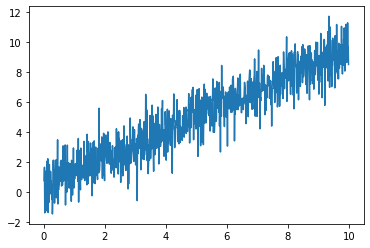

In [334]:
x = x_old.copy()
y = y_old.copy()

x = np.asarray(x)
y = np.asarray(y)
plt.plot(x, y)

In [325]:
print(x[0],y[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [335]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x.reshape(-1,1))
x = scaler.transform(x.reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit(y.reshape(-1,1))
y = scaler.transform(y.reshape(-1,1))

In [338]:
x = x.ravel()
y = y.ravel()

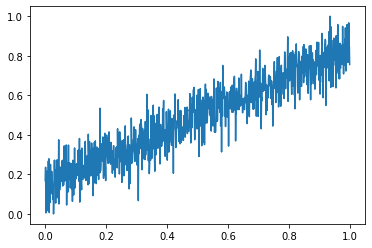

In [342]:
plt.plot(x,y)

In [346]:
x0 = np.array([0, 0])
f = rational


fprime = lambda x: optimize.approx_fprime(x, MSE, 0.0001)
res1_l = gradient_descent(x0, MSE, fprime)

options = {'disp': True}

res2_l = optimize.minimize(MSE, x0, method='Newton-CG', options=options, jac = fprime)

p0 = [0,0]
res3, pcov = curve_fit(rational, p0 = p0,  xdata = x, ydata= y, method='lm')

print(max(res1_l[0]), max(res1_l[1]))
print(res2_l.x)
print(res3)

C:\Users\mi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


         Current function value: 9.640174
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 141
         Hessian evaluations: 0
108797.12059860428 0
[ 0.29192351 -0.69085453]
[ 0.29218506 -0.69040713]


In [347]:
print(res1_l[2])


[285.33301539880347, 44.970450251865486, 33.39179794306979, 26.71374047255654, 21.313566467657864, 17.990175376633054, 15.424305736994876, 13.689661787652872, 12.480842571574469, 11.677633959120485, 11.071768772142219, 10.651286476432093, 10.344960628595064, 10.133440784631661, 9.981752310243962, 9.879218616256107, 9.80538684766284, 9.75534213187589, 9.71921843978695, 9.69435234244668, 3376.472920746065, 11836818044.347204, 285.30550621084797, 285.3055062208389, 285.30550621084814, 285.30550622083894, 285.30550621084825, 285.3055062208389, 285.3055062108484, 285.30550622083865, 285.30550621084797, 285.3055062208389, 285.30550621084814, 285.30550622083894, 285.30550621084825, 285.3055062208389, 285.3055062108484, 285.30550622083865, 285.30550621084797, 285.3055062208389, 285.30550621084814, 285.30550622083894, 285.30550621084825, 285.3055062208389, 285.3055062108484, 285.30550622083865, 285.30550621084797, 285.3055062208389, 285.30550621084814, 285.30550622083894, 285.30550621084825, 28

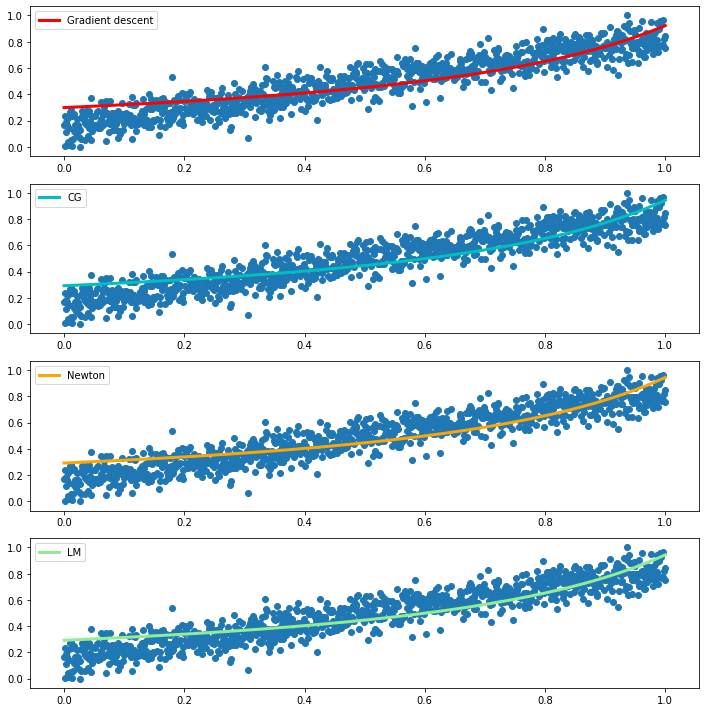

In [348]:

plt.figure(figsize = (10,10))
plt.subplot(4,1,1)
e = 0

plt.plot(x[e:], rational(np.asarray(x), res1_l[0][19], res1_l[1][19])[e:], label = "Gradient descent", color = 'r', linewidth = 3)
plt.scatter(x[e:], y[e:])
plt.legend()
plt.subplot(4,1,2)
plt.plot(x, rational(np.asarray(x), *res2_l.x), label = "CG", color = 'c', linewidth = 3)
plt.scatter(x, y)
plt.legend()
plt.subplot(4,1,3)
plt.plot(x, rational(np.asarray(x), *res2_l.x), label = "Newton", color = 'orange', linewidth = 3)
plt.scatter(x, y)
plt.legend()
plt.subplot(4,1,4)
plt.plot(x, rational(np.asarray(x), res3[0], res3[1]), label = "LM", color = 'lightgreen', linewidth = 3)
plt.scatter(x, y)
plt.legend()
plt.tight_layout()



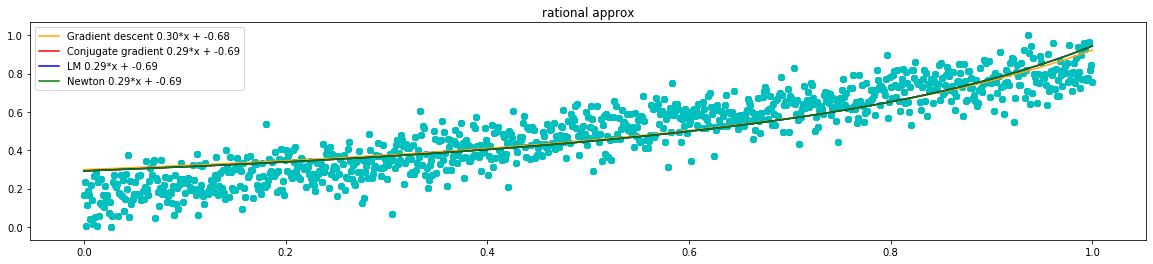

In [353]:
plt.figure(figsize = (20,4))
plot_approx([res1_l[0][19], res1_l[1][19]], rational, color = 'orange',name = "Gradient descent: rational approx",
            label ='Gradient descent %.2f*x + %.2f'%tuple((res1_l[0][19], res1_l[1][19])))
plot_approx(res2_l.x, rational, color = 'red',name ="Сonjugate gradient: rational approx",
            label ='Сonjugate gradient %.2f*x + %.2f'%tuple(res2_l.x))
plot_approx([res3[0],  res3[1]],f = rational, color = 'blue',name ="LM: rational approx",
            label ='LM %.2f*x + %.2f'%tuple([res3[0],  res3[1]]))
plot_approx(res2_l.x, rational, color = 'green', name ="rational approx",
            label ='Newton %.2f*x + %.2f'%tuple(res2_l.x))

In [284]:
options = {'xatol': 1e-3, 'disp': True}
x0 = np.array([0, 0])
f = linear
fprime = lambda x: optimize.approx_fprime(x, MSE, 0.01)
res_linear_nm = minimize(MSE, x0, jac = fprime, method='Newton-CG',
               options=options)
print(res_linear_nm)

         Current function value: 1031.964286
         Iterations: 2
         Function evaluations: 44
         Gradient evaluations: 41
         Hessian evaluations: 0
     fun: 1031.9642856035796
     jac: array([-3.84266741e-05, -2.61459263e-05])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 44
    nhev: 0
     nit: 2
    njev: 41
  status: 2
 success: False
       x: array([0.44091481, 0.75347671])


C:\Users\Zoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: OptimizeWarning: Unknown solver options: xatol
  


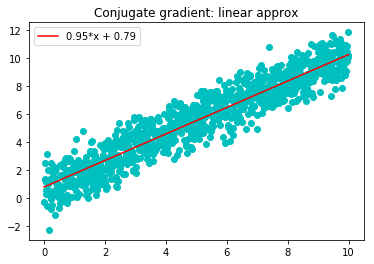

In [261]:
plot_approx(res_linear_nm.x, linear, "Сonjugate gradient: linear approx",
            label ='%.2f*x + %.2f'%tuple(res_linear_nm.x))

In [262]:
gradient_decent = GD(0, 0, x, y, 0.001, 3)
print(interations_GD)

10151


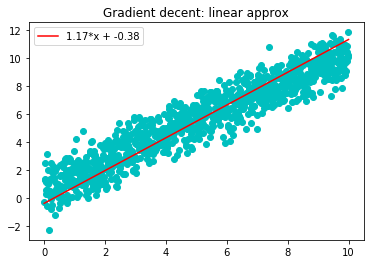

In [263]:
plot_approx(gradient_decent, linear, "Gradient decent: linear approx",
            label ='%.2f*x + %.2f'%tuple(gradient_decent))

In [264]:

res_linear_lm = optimize.least_squares(MSE_2, x0, method='lm', args =[[-1,-1]])

TypeError: MSE_2() takes 1 positional argument but 2 were given

In [265]:
res_linear_lm.x


array([0.52532725, 0.52532725])

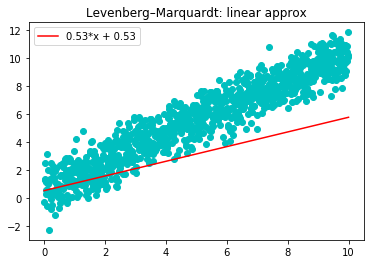

In [266]:
plot_approx(res_linear_lm.x, linear, "Levenberg–Marquardt: linear approx",
            label ='%.2f*x + %.2f'%tuple(res_linear_lm.x))

### Rational

In [267]:
options = {'xatol': 1e-3, 'disp': True}
x0 = np.array([-1, -1])
f = rational
fprime = lambda x: optimize.approx_fprime(x, MSE, 0.01)
res_linear_nm = minimize(MSE, x0, jac = fprime, method='Newton-CG',
               options=options)
print(res_linear_nm)

C:\Users\Zoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: OptimizeWarning: Unknown solver options: xatol
  


TypeError: rational() takes 2 positional arguments but 3 were given

In [268]:
plot_approx(res_linear_nm.x, rational, "Сonjugate gradient: rational approx",
            label ='%.2f*x + %.2f'%tuple(res_linear_nm.x))

TypeError: rational() takes 2 positional arguments but 3 were given

In [274]:
f = rational
x0 = np.array([1, 1])
res_linear_lm = optimize.least_squares(MSE_2, x0, method='lm')

ValueError: Method 'lm' doesn't work when the number of residuals is less than the number of variables.